In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 22
plt.rcParams['text.latex.preamble'] = '\\usepackage{amsmath}'

In [3]:
landers_tri_depth, landers_avg_tri_moment, fialko_moment = np.load('depth_vs_moment_landers_fialko.npy')
wenchuan_tri_depth, wenchuan_avg_tri_moment = np.load('depth_vs_moment_wenchuan.npy')

In [54]:
fielding_depth, fielding_moment = np.load('fielding_moment_depth.npy')

In [58]:
fielding_moment /= np.sum(fielding_moment) / np.sum(wenchuan_avg_tri_moment)

In [30]:
print('wenchuan', np.sum(wenchuan_tri_depth * wenchuan_avg_tri_moment) / np.sum(wenchuan_avg_tri_moment))
print('landers', np.sum(landers_tri_depth * landers_avg_tri_moment) / np.sum(landers_avg_tri_moment))
print('fialko', np.sum(landers_tri_depth * fialko_moment) / np.sum(fialko_moment))

wenchuan 8878.77443093
landers 5093.13248963
fialko 6023.5314868


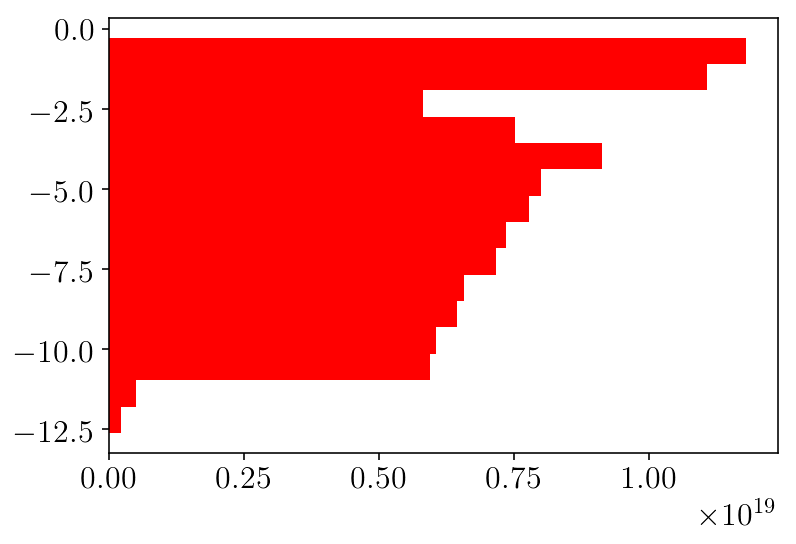

In [33]:
a,b,c = plt.hist(
        -landers_tri_depth / 1000.0, weights = landers_avg_tri_moment ,
        bins = 15, rwidth = 0.3,
        orientation = 'horizontal', color = 'r',
        histtype = 'stepfilled'
    )

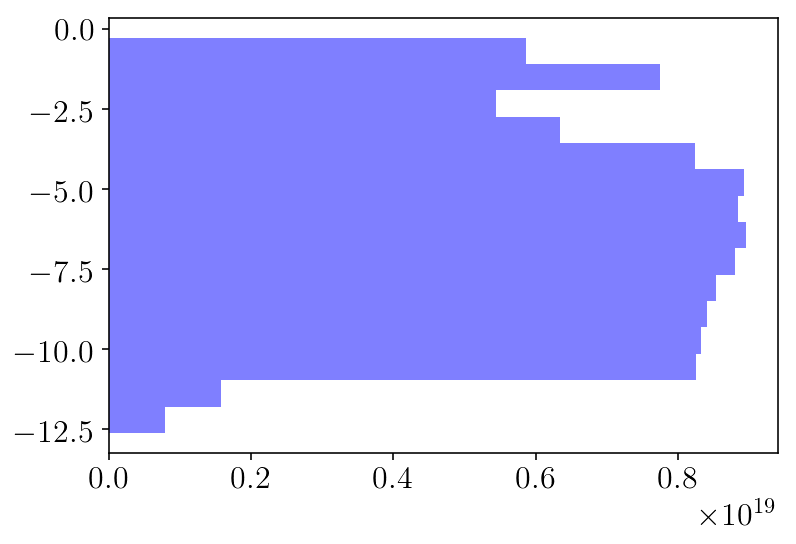

In [34]:
a2,b2,c2 = plt.hist(
        -landers_tri_depth / 1000.0, weights = fialko_moment,
        bins = 15, rwidth = 0.7,
        orientation = 'horizontal', color = (0,0,1,0.5),
        histtype = 'stepfilled'
    )

In [46]:
print('<1km ratio: ', a[-1] / a2[-1])
print('~10km ratio: ', a[3] / a2[3])
print('depth at idx 3: ', b[3])

<1km ratio:  2.01314480307
~10km ratio:  0.726574249646
depth at idx 3:  -10.1507343902


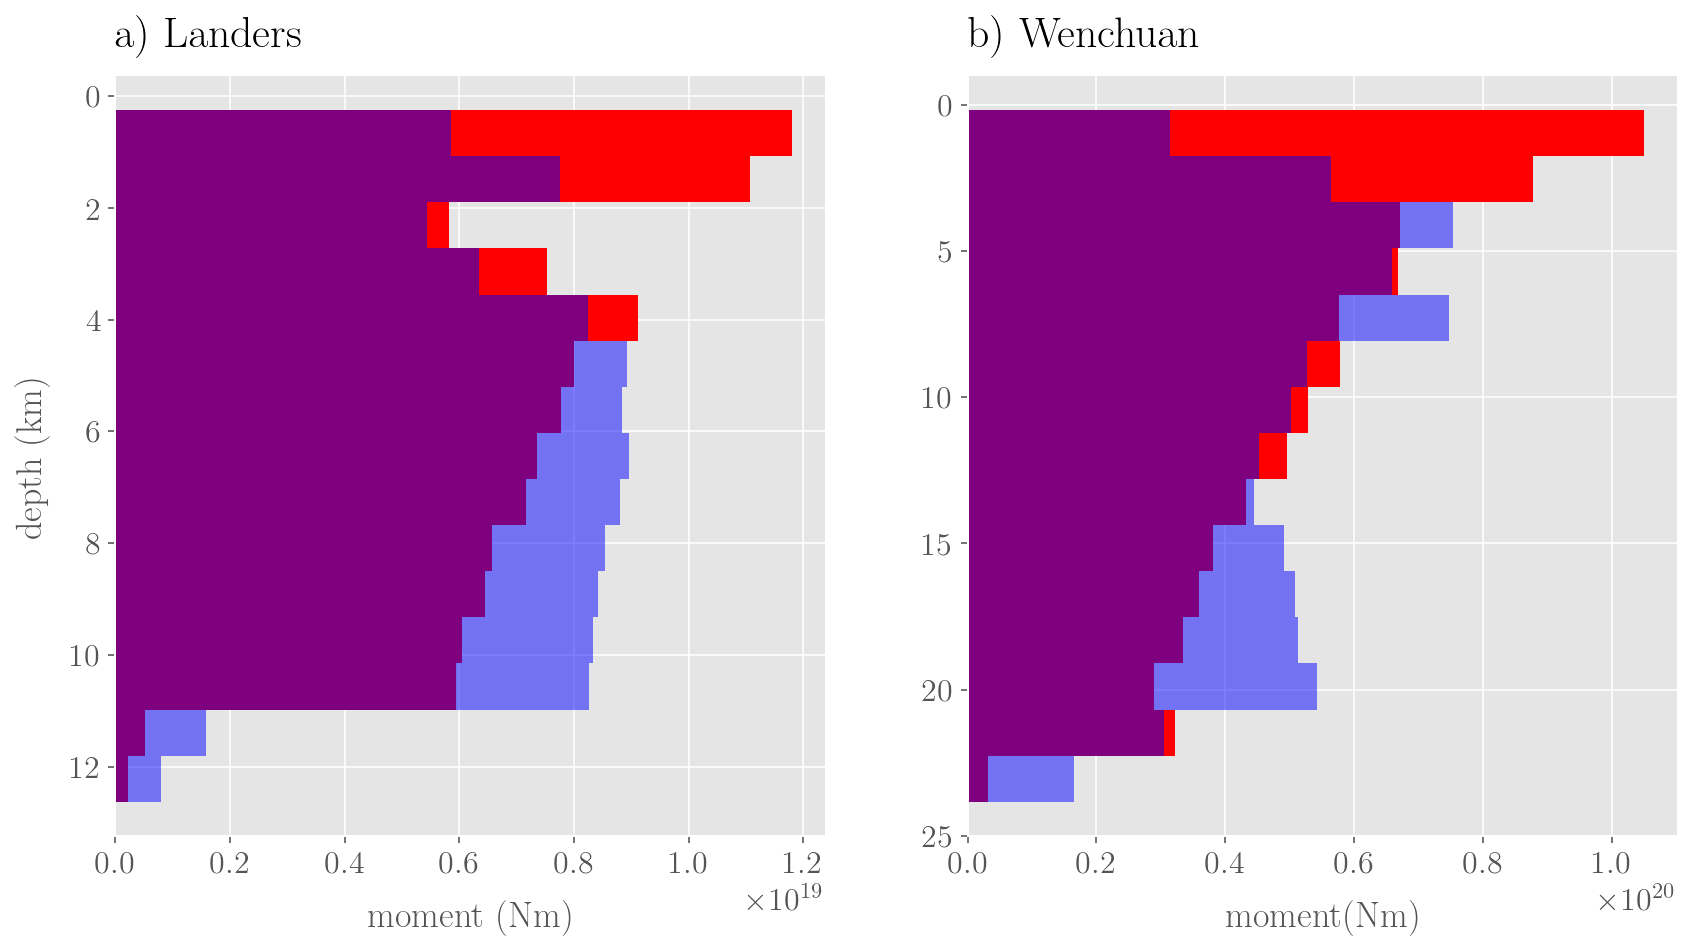

In [68]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (14,7))
    ax1 = plt.subplot(1, 2, 1)
    plt.hist(
        -landers_tri_depth / 1000.0, weights = landers_avg_tri_moment ,
        bins = 15, rwidth = 0.3,
        orientation = 'horizontal', color = 'r',
        histtype = 'stepfilled'
    )
    plt.hist(
        -landers_tri_depth / 1000.0, weights = fialko_moment,
        bins = 15, rwidth = 0.7,
        orientation = 'horizontal', color = (0,0,1,0.5),
        histtype = 'stepfilled'
    )
    plt.ylabel('$\mathrm{depth~(km)}$', fontsize = 18, labelpad = 10)
    plt.xlabel('$\mathrm{moment~(Nm)}$', fontsize = 18, labelpad = 10)
    plt.gca().set_yticklabels(['$\mathrm{' + str(int(-d)) + '}$' for d in plt.gca().get_yticks()])    
    
    
    plt.subplot(1,2,2)
    ht, bins, _ = plt.hist(
        -wenchuan_tri_depth / 1000.0, weights = wenchuan_avg_tri_moment ,
        bins = 15, rwidth = 0.3,
        orientation = 'horizontal', color = 'r',
        histtype = 'stepfilled'
    )
    plt.hist(
        -fielding_depth / 1000.0, weights = fielding_moment ,
        bins = bins, rwidth = 0.3,
        orientation = 'horizontal', color = (0,0,1,0.5),
        histtype = 'stepfilled'
    )
    #plt.ylabel('$\mathrm{depth (km)}$', fontsize = 18, labelpad = 10)
    plt.xlabel('$\mathrm{moment (Nm)}$', fontsize = 18, labelpad = 10)
    plt.gca().set_yticklabels(['$\mathrm{' + str(int(-d)) + '}$' for d in plt.gca().get_yticks()])    
    plt.text(-1.324e20, 2, '$\mathrm{a)~Landers}$', size = 22)
    plt.text(0, 2, '$\mathrm{b)~Wenchuan}$', size = 22)
    
    plt.savefig('depth_vs_moment_both.pdf', bbox_inches = 'tight')
    plt.show()